In [38]:
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## READ MNIST DATA

In [39]:
import os
import struct
import numpy as np
import matplotlib.pyplot as pyplot


"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    return img, lbl
    


In [40]:
path = 'MNIST/'
X_train, y_train = read("testing", path)
X_test, y_test = read("training", path)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(60000, 784)
(60000,)


## Preprocessing with StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



## SVM training

In [45]:
from sklearn import datasets, svm, metrics


# hyper-parameter
C  = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Model Instance    
classifier = svm.SVC(kernel = 'linear',
                     C = 0.01,
                     decision_function_shape= 'ovr',
                     random_state=108)

# prediction
y_pred = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)


In [57]:
print(f1_score(y_test, y_pred, average='macro'))

0.9217899111317452


In [ ]:
a = f1_score(y_test, y_pred, average='macro')
print(a)
 >> f1_score = 0.9217899111317452

score = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print(np.mean(score))
 >> k_fold_f1_score =  0.92583975400000

In [44]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

#C  = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#cv = KFold(n_splits=5, shuffle=False)

#C  = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


for c in C:
    
    try:

        classifier = svm.SVC(kernel = 'linear',
                             
                             C = 0.01, 
                             decision_function_shape= 'ovr',
                             random_state=108)
        #
        classifier.fit(X_train_scaled, y_train)
        
        #score = cross_val_score(classifier, X_train_scaled, y_train)
        
        #LinearSvc = classifier.fit(X_train_scaled, y_train)
        #K_foldCV_scores = cross_val_score(estimator=classifier,
                 #X=X_train_scaled,
                 #y=y_train,
                 #cv=cv,
                 #n_jobs=-1)
        
        #y_pred = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)
        #f1score = f1_score(y_test, y_pred, average='macro')
        print(f1socre)
        score = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='f1_macro')
        print(np.mean(score))

    except Exception as ex:
        print('ERROR:', ex)
        break
    finally:
        print('=======================================')



SyntaxError: 'break' outside loop (<ipython-input-44-e892e0fc2d14>, line 41)

In [56]:
from sklearn.metrics import f1_score

a = f1_score(y_test, y_pred, average='macro')
print(a)
 >> f1_score = 0.9217899111317452

score = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print(np.mean(score))
 >> k_fold_f1_score =  0.9258397540000001


0.9217899111317452


In [46]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))


Classification report for classifier SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=108,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.92      0.91      5958
           3       0.91      0.88      0.90      6131
           4       0.91      0.94      0.93      5842
           5       0.89      0.89      0.89      5421
           6       0.95      0.96      0.96      5918
           7       0.93      0.93      0.93      6265
           8       0.93      0.86      0.89      5851
           9       0.91      0.89      0.90      5949

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg 

## K-FOLD CV

In [20]:
from sklearn.model_selection import cross_val_score
# hyper-parameter
C = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
values = []
for c in C:
    
    # Model Instance 
    classifier = svm.SVC(kernel = 'linear',
                                     C = c, 
                                     decision_function_shape= 'ovr',
                                     random_state=108)
    # Model evaluation k_fold
    scores = cross_val_score(estimator=classifier,
                             X=X_train_scaled,
                             y=y_train,
                             cv=5,
                             scoring='f1_macro'
                             n_jobs=-1)

    print('CV f1_macro scores: %s' % scores)
    print('CV f1_macro: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    values.append(np.mean(scores))

CV accuracy scores: [0.89865202 0.90813779 0.925      0.93293293 0.94639279]
CV accuracy: 0.922 +/- 0.017
CV accuracy scores: [0.9121318  0.90763854 0.93       0.94094094 0.94388778]
CV accuracy: 0.927 +/- 0.015
CV accuracy scores: [0.89465801 0.90264603 0.923      0.92692693 0.93336673]
CV accuracy: 0.916 +/- 0.015
CV accuracy scores: [0.89216176 0.90114828 0.92       0.92642643 0.93286573]
CV accuracy: 0.915 +/- 0.015
CV accuracy scores: [0.89216176 0.90114828 0.92       0.92642643 0.93286573]
CV accuracy: 0.915 +/- 0.015
CV accuracy scores: [0.89216176 0.90114828 0.92       0.92642643 0.93286573]
CV accuracy: 0.915 +/- 0.015
CV accuracy scores: [0.89216176 0.90114828 0.92       0.92642643 0.93286573]
CV accuracy: 0.915 +/- 0.015


In [21]:
print(values)

[0.9222231067562319, 0.9269198121950637, 0.9161195408655919, 0.9145204385673861, 0.9145204385673861, 0.9145204385673861, 0.9145204385673861]


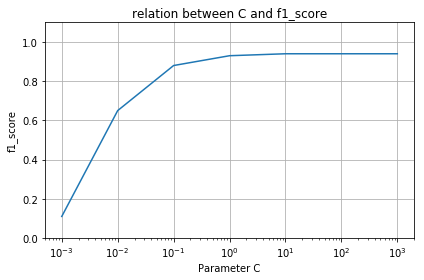

In [51]:
import matplotlib.pyplot as plt

f1_score = [0.11, 0.65, 0.88, 0.93, 0.94, 0.94]
c = [0.001, 0.01, 0.1, 1.0, 10, 1000]
plt.title("relation between C and f1_score")
plt.plot(c, f1_score)

plt.grid()
plt.xscale('log')
plt.ylabel('f1_score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [9]:
a = [0.89733031, 0.90706668, 0.92378847, 0.93143688, 0.94562302] #0.001

b = [0.91094132, 0.90637636, 0.92901128, 0.93980855, 0.94306126] #0.01

c=[0.8931477,  0.9015262,  0.92191558, 0.92602243, 0.93223575] #0.1

d=[0.89068799, 0.9000524,  0.91886021, 0.9255447,  0.93171955] #1

e=[0.89068799, 0.9000524,  0.91886021, 0.9255447,  0.93171955] #10

f=[0.89068799, 0.9000524,  0.91886021, 0.9255447,  0.93171955] #100

g=[0.89068799, 0.9000524,  0.91886021, 0.9255447,  0.93171955] #1000

print(np.mean(a))
print(np.mean(b))
print(np.mean(c))
print(np.mean(d))
print(np.mean(e))
print(np.mean(f))
print(np.mean(g))


0.921049072
0.9258397540000001
0.9149695320000001
0.91337297
0.91337297
0.91337297
0.91337297


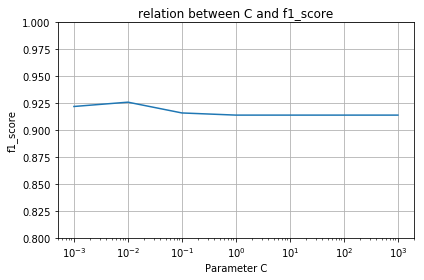

In [36]:
import matplotlib.pyplot as plt

f1_score = [0.922, 0.926, 0.916, 0.914, 0.914, 0.914, 0.914]
c = [0.001, 0.01, 0.1, 1.0, 10, 100,1000]
plt.title("relation between C and f1_score")
plt.plot(c, f1_score)

plt.grid()
plt.xscale('log')
plt.ylabel('f1_score')
plt.xlabel('Parameter C')
plt.ylim(0.8, 1.0 )
plt.tight_layout()
plt.show()

In [58]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

classnaems = y_test
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


for c in C:




AttributeError: module 'matplotlib.cm' has no attribute 'Green'